In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [18]:
# Veri dosyasını oku
df = pd.read_csv('normalized_data.csv')

In [19]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [20]:
# Eksik değerleri kontrol et
print("Eksik değerler:")
print(df.isnull().sum())

Eksik değerler:
Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    1
Diastolic blood pressure (mm Hg)                                            1
Triceps skinfold thickness (mm)                                             1
2-Hour serum insulin (mu U/ml)                                              1
Body mass index (weight in kg/(height in m)^2)                              1
Diabetes pedigree function                                                  1
Age (years)                                                                 1
Class variable (0 or 1)                                                     1
dtype: int64


In [21]:
# Eksik değerleri temizle
df = df.dropna()

In [22]:
# Özellikler (X) ve hedef değişken (y) olarak ayır
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

In [23]:
# Veri setini eğitim ve test setlerine ayır (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Gaussian Naive Bayes sınıflandırıcıyı oluştur ve eğit
gnb = GaussianNB()

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
# Test seti ile tahmin yap
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:, 1]

In [26]:
# Performans metriklerini hesapla
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

In [27]:
sensitivity = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

In [28]:
# ROC eğrisi ve AUC hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

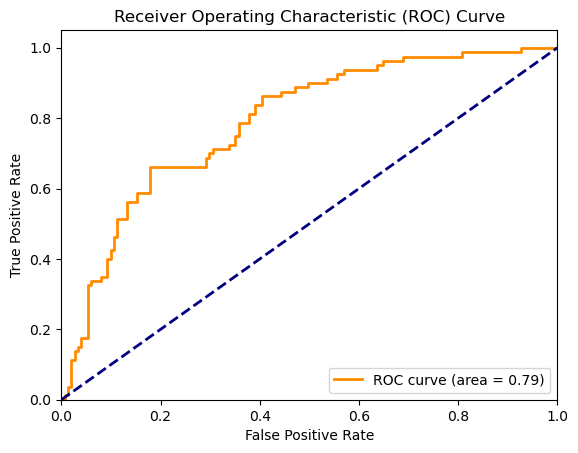

In [29]:
# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Performans metriklerini yazdır
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Confusion Matrix:
 [[119  32]
 [ 27  53]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       151
         1.0       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Sensitivity (Recall): 0.66
Specificity: 0.79
ROC AUC: 0.79


In [15]:
import seaborn as sns

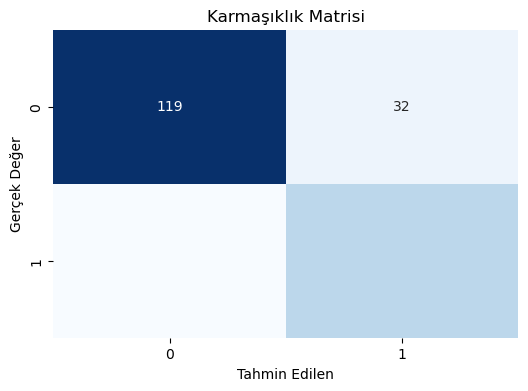

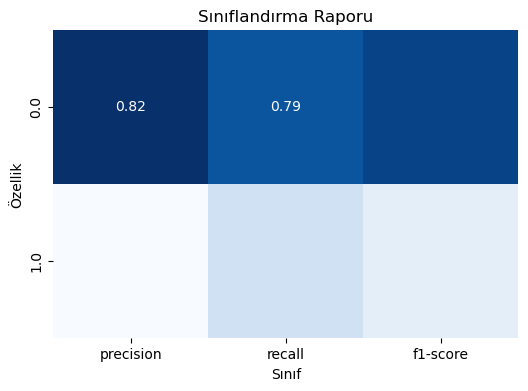

In [16]:
# Karmaşıklık matrisi
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

# Sınıflandırma raporu
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df = class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])
plt.figure(figsize=(6, 4))
sns.heatmap(class_report_df.iloc[:, :-1], annot=True, cmap='Blues', fmt=".2f", cbar=False)
plt.xlabel('Sınıf')
plt.ylabel('Özellik')
plt.title('Sınıflandırma Raporu')
plt.show()